In [459]:
import numpy as np
from math import sqrt
import pandas as pd
from neupy import algorithms
from sklearn import decomposition
from scipy import stats
from sklearn import datasets
from skimage.measure import block_reduce
import matplotlib.gridspec as gridspec
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [460]:
zip_train = pd.read_csv("Zip_codes/zip_train.csv", header=None, sep=" ")
zip_test = pd.read_csv("Zip_codes/zip_test.csv", header=None, sep=" ")
zip_train = zip_train.drop([257], axis=1)

In [461]:
"""
digits = datasets.load_digits()
data = digits.data
n_inputs = len(data[0])
sofm = algorithms.SOFM(
    n_inputs=n_inputs,
    n_outputs=10,
    
    # With large number of training samples it's safer
    # to use small step (learning rate)
    step=0.05,
    shuffle_data=True,         # Shuffles dataset before every training epoch.
    weight='sample_from_data',

    learning_radius=0,
    
    # after 10 iteration learning radius would be 0
    #reduce_radius_after=1,
    verbose=True,             # Shows training progress in terminal
    show_epoch = 20           # Shows verbose each N
)
sofm.train(data, epochs=100)
"""

"\ndigits = datasets.load_digits()\ndata = digits.data\nn_inputs = len(data[0])\nsofm = algorithms.SOFM(\n    n_inputs=n_inputs,\n    n_outputs=10,\n    \n    # With large number of training samples it's safer\n    # to use small step (learning rate)\n    step=0.05,\n    shuffle_data=True,         # Shuffles dataset before every training epoch.\n    weight='sample_from_data',\n\n    learning_radius=0,\n    \n    # after 10 iteration learning radius would be 0\n    #reduce_radius_after=1,\n    verbose=True,             # Shows training progress in terminal\n    show_epoch = 20           # Shows verbose each N\n)\nsofm.train(data, epochs=100)\n"

In [462]:
zip_train

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.000,-1.000,-1.000,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
5,6.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.397,0.983,-0.535,-1.000,...,0.803,0.015,-0.862,-0.871,-0.437,-1.000,-1.000,-1.000,-1.000,-1.0
6,3.0,-1.000,-1.000,-1.000,-0.830,0.442,1.000,1.000,0.479,-0.328,...,1.000,0.671,0.345,-0.507,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7,1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.510,-0.213,...,-0.654,0.666,0.301,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
8,0.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.454,0.879,-0.745,-1.000,...,1.000,1.000,1.000,0.506,-0.174,-0.811,-1.000,-1.000,-1.000,-1.0
9,1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.909,0.801,...,-1.000,-0.332,0.735,0.380,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0


In [463]:
zip_train.isna().sum().sum()

0

In [464]:
zip_test.isna().sum().sum()

0

In [528]:
y_train = zip_train.iloc[:,0].values.astype(np.int)
x_train = (zip_train.iloc[:,1:257].values >= 0.3).astype(np.int)
#x_train = (zip_train.iloc[:,1:257].values).astype(np.int)

y_test = zip_test.iloc[:,0].values.astype(np.int)
x_test = (zip_test.iloc[:,1:257].values >= 0.3).astype(np.int)
#x_test = (zip_test.iloc[:,1:257].values).astype(np.int)

matrix_x_train = [pos.reshape(16,16) for pos in x_train]          
matrix_x_test  = [pos.reshape(16,16) for pos in x_test]           
new_data = list(zip(matrix_x_train, y_train))

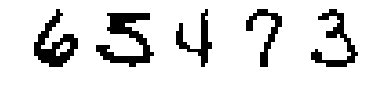

In [529]:
i = 1
for index in range(5):
    plt.subplot(1, 5, i)
    number = matrix_x_train[index]
    plt.axis('off')
    plt.imshow(number, cmap=plt.cm.gray_r, interpolation='nearest')
    i +=1

In [530]:
#pca_train = decomposition.PCA(n_components=2)
#pca_train.fit(x_train)
#x_train = pca_train.transform(x_train)

In [531]:
matrix_x_train[0]

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]])

In [532]:
def split(array, nrows, ncols):
    """Split a matrix into sub-matrices."""

    r, h = array.shape
    return (array.reshape(h//nrows, nrows, -1, ncols)
                 .swapaxes(1, 2)
                 .reshape(-1, nrows, ncols))

In [583]:
submatrix_side_len = 8
submatrix_height_len = 8
submatrix_size = submatrix_side_len * submatrix_height_len

height_factor = 16 // submatrix_side_len
width_factor = 16 // submatrix_height_len

In [584]:
resize_data_train = np.zeros((len(matrix_x_train), submatrix_size))
for i in range(len(matrix_x_train)):
    downsampled = block_reduce(matrix_x_train[i], block_size=(height_factor, width_factor), func=np.mean)
    resize_data_train[i] = downsampled.flatten() > 0.2

In [585]:
resize_data_test = np.zeros((len(matrix_x_test), submatrix_size))
for i in range(len(matrix_x_test)):
    downsampled = block_reduce(matrix_x_test[i], block_size=(height_factor, width_factor), func=np.mean)
    resize_data_test[i] = downsampled.flatten() > 0.2

In [586]:
matrix_x_train_resized = [pos.reshape(submatrix_side_len, submatrix_height_len) for pos in resize_data_train]          
matrix_x_test_resized  = [pos.reshape(submatrix_side_len, submatrix_height_len) for pos in resize_data_test] 
len(matrix_x_train_resized)

7291

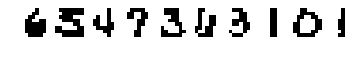

In [631]:
i = 1
for index in range(10):
    plt.subplot(1, 10, i)
    number = matrix_x_train_resized[index]
    plt.axis('off')
    plt.imshow(number, cmap=plt.cm.gray_r)
    i +=1

In [632]:
n_inputs = len(resize_data_train[0])
#n_inputs = len(x_train[0])
n_inputs

64

In [633]:
GRID_HEIGHT = 44
GRID_WIDTH = 45
GRID_HEIGHT*GRID_WIDTH

1980

In [634]:
sofm = algorithms.SOFM(
    n_inputs=n_inputs,
    n_outputs=10,
    distance='euclid',
    #features_grid=(GRID_HEIGHT, GRID_WIDTH),  # Just me trying weird stuff
    grid_type='rect',
    # With large number of training samples it's safer
    # to use small step (learning rate)
    step=0.05,
    std=1,
    shuffle_data=True,         # Shuffles dataset before every training epoch.
    weight='sample_from_data',

    learning_radius=3,
    
    # after 10 iteration learning radius would be 0
    reduce_radius_after=5,
    verbose=True,             # Shows training progress in terminal
    show_epoch = 5           # Shows verbose each N
)
sofm.train(resize_data_train, epochs=20)
#sofm.train(x_train, epochs=10)


Main information

[ALGORITHM] SOFM

[OPTION] distance = ['euclid', 'neg_euclid_distance']
[OPTION] features_grid = None
[OPTION] grid_type = ['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid']
[OPTION] learning_radius = 3
[OPTION] n_inputs = 64
[OPTION] n_outputs = 10
[OPTION] reduce_radius_after = 5
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION] show_epoch = 5
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] std = 1
[OPTION] step = 0.05
[OPTION] verbose = True
[OPTION] weight = sample_data



#1 : [2 sec] train: 0.325645


#5 : [1 sec] train: 0.310173


#10 : [2 sec] train: 0.286371


#15 : [2 sec] train: 0.227639


#20 : [1 sec] train: 0.225439


In [635]:
a = sofm.predict(resize_data_train)
#a = sofm.predict(x_train)

In [636]:
a.shape

(7291, 10)

In [637]:
#clusters = sofm.predict(x_test).argmax(axis=1)
clusters = sofm.predict(resize_data_test).argmax(axis=1)

In [638]:
y_test

array([9, 6, 3, ..., 4, 0, 1])

In [639]:
""""
print("Building visualization...")
plt.figure(figsize=(12, 11))

grid = gridspec.GridSpec(GRID_HEIGHT, GRID_WIDTH)
grid.update(wspace=0, hspace=0)
Samples = []
for row_id in range(GRID_HEIGHT):
    print("Progress: {:.2%}".format(row_id / GRID_HEIGHT))

    for col_id in range(GRID_WIDTH):
        index = row_id * GRID_HEIGHT + col_id
        clustered_samples = x_test[clusters == index]

        if len(clustered_samples) > 0:
            # We take the first sample, but it can be any
            # sample from this cluster
            sample = clustered_samples[0]
        else:
            # If we don't have samples in cluster then
            # it means that there is a gap in space
            sample = np.zeros(256)
        Samples.append(sample)
        plt.subplot(grid[index])
        plt.imshow(sample.reshape((16, 16)), cmap='Greys')
        plt.axis('off')

print("Visualization has been built succesfully")
plt.show()
"""

'"\nprint("Building visualization...")\nplt.figure(figsize=(12, 11))\n\ngrid = gridspec.GridSpec(GRID_HEIGHT, GRID_WIDTH)\ngrid.update(wspace=0, hspace=0)\nSamples = []\nfor row_id in range(GRID_HEIGHT):\n    print("Progress: {:.2%}".format(row_id / GRID_HEIGHT))\n\n    for col_id in range(GRID_WIDTH):\n        index = row_id * GRID_HEIGHT + col_id\n        clustered_samples = x_test[clusters == index]\n\n        if len(clustered_samples) > 0:\n            # We take the first sample, but it can be any\n            # sample from this cluster\n            sample = clustered_samples[0]\n        else:\n            # If we don\'t have samples in cluster then\n            # it means that there is a gap in space\n            sample = np.zeros(256)\n        Samples.append(sample)\n        plt.subplot(grid[index])\n        plt.imshow(sample.reshape((16, 16)), cmap=\'Greys\')\n        plt.axis(\'off\')\n\nprint("Visualization has been built succesfully")\nplt.show()\n'

In [640]:
#pca_test = decomposition.PCA(n_components=2)
#pca_test.fit(x_test)
#x_test = pca_test.transform(x_test)

In [641]:
array_samples = np.asarray(Samples)
array_samples.shape

(164, 256)

In [642]:
predicted = sofm.predict(resize_data_test)
#predicted = sofm.predict(x_test)
predicted = predicted.nonzero()[1]

In [643]:
original_y_test = y_test

Mapping 0

Información del clasificador SOFM SOFM(verbose=True, step=0.05, show_epoch=5, shuffle_data=True, signals=None, n_inputs=64, n_outputs=10, weight=(64, 10), features_grid=[10, 1], distance=['euclid', 'neg_euclid_distance'], grid_type=['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid'], learning_radius=3, std=1, reduce_radius_after=5, reduce_std_after=100, reduce_step_after=100):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       359
           1       0.01      0.01      0.01       264
           2       0.02      0.02      0.02       198
           3       0.00      0.00      0.00       166
           4       0.32      0.21      0.25       200
           5       0.08      0.11      0.09       160
           6       0.00      0.00      0.00       170
           7       0.00      0.01      0.01       147
           8       0.03      0.04      0.03       166
           9       0.00      0.00      0.

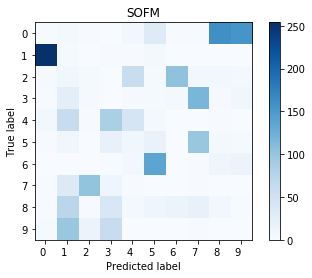

Mapping 1

Información del clasificador SOFM SOFM(verbose=True, step=0.05, show_epoch=5, shuffle_data=True, signals=None, n_inputs=64, n_outputs=10, weight=(64, 10), features_grid=[10, 1], distance=['euclid', 'neg_euclid_distance'], grid_type=['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid'], learning_radius=3, std=1, reduce_radius_after=5, reduce_std_after=100, reduce_step_after=100):
              precision    recall  f1-score   support

           0       0.01      0.02      0.01       177
           1       0.01      0.01      0.01       359
           2       0.00      0.00      0.00       264
           3       0.00      0.00      0.00       198
           4       0.02      0.01      0.01       166
           5       0.02      0.02      0.02       200
           6       0.00      0.00      0.00       160
           7       0.00      0.01      0.00       170
           8       0.00      0.00      0.00       147
           9       0.01      0.01      0.

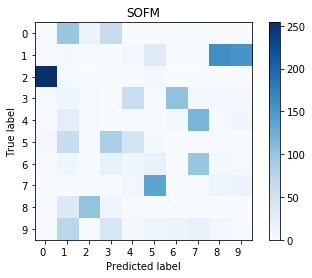

Mapping 2

Información del clasificador SOFM SOFM(verbose=True, step=0.05, show_epoch=5, shuffle_data=True, signals=None, n_inputs=64, n_outputs=10, weight=(64, 10), features_grid=[10, 1], distance=['euclid', 'neg_euclid_distance'], grid_type=['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid'], learning_radius=3, std=1, reduce_radius_after=5, reduce_std_after=100, reduce_step_after=100):
              precision    recall  f1-score   support

           0       0.00      0.01      0.00       166
           1       0.32      0.56      0.40       177
           2       0.01      0.00      0.00       359
           3       0.00      0.00      0.00       264
           4       0.45      0.30      0.36       198
           5       0.01      0.02      0.02       166
           6       0.00      0.00      0.00       200
           7       0.40      0.61      0.48       160
           8       0.05      0.06      0.06       170
           9       0.00      0.00      0.

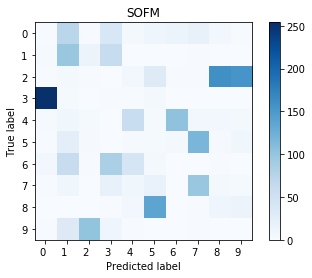

Mapping 3

Información del clasificador SOFM SOFM(verbose=True, step=0.05, show_epoch=5, shuffle_data=True, signals=None, n_inputs=64, n_outputs=10, weight=(64, 10), features_grid=[10, 1], distance=['euclid', 'neg_euclid_distance'], grid_type=['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid'], learning_radius=3, std=1, reduce_radius_after=5, reduce_std_after=100, reduce_step_after=100):
              precision    recall  f1-score   support

           0       0.00      0.01      0.00       147
           1       0.23      0.44      0.30       166
           2       0.11      0.08      0.09       177
           3       0.00      0.00      0.00       359
           4       0.01      0.00      0.01       264
           5       0.01      0.02      0.01       198
           6       0.04      0.03      0.03       166
           7       0.00      0.00      0.00       200
           8       0.02      0.03      0.02       160
           9       0.08      0.08      0.

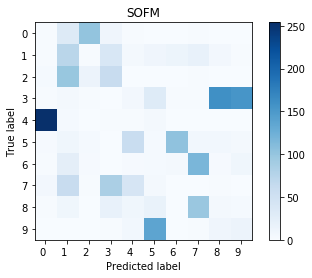

Mapping 4

Información del clasificador SOFM SOFM(verbose=True, step=0.05, show_epoch=5, shuffle_data=True, signals=None, n_inputs=64, n_outputs=10, weight=(64, 10), features_grid=[10, 1], distance=['euclid', 'neg_euclid_distance'], grid_type=['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid'], learning_radius=3, std=1, reduce_radius_after=5, reduce_std_after=100, reduce_step_after=100):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       170
           1       0.10      0.22      0.14       147
           2       0.01      0.01      0.01       166
           3       0.28      0.34      0.31       177
           4       0.05      0.02      0.02       359
           5       0.02      0.02      0.02       264
           6       0.85      0.53      0.65       198
           7       0.48      0.71      0.57       166
           8       0.01      0.01      0.01       200
           9       0.02      0.02      0.

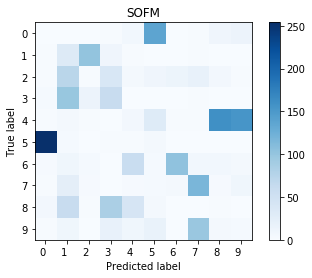

Mapping 5

Información del clasificador SOFM SOFM(verbose=True, step=0.05, show_epoch=5, shuffle_data=True, signals=None, n_inputs=64, n_outputs=10, weight=(64, 10), features_grid=[10, 1], distance=['euclid', 'neg_euclid_distance'], grid_type=['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid'], learning_radius=3, std=1, reduce_radius_after=5, reduce_std_after=100, reduce_step_after=100):
              precision    recall  f1-score   support

           0       0.00      0.01      0.00       160
           1       0.00      0.00      0.00       170
           2       0.82      0.69      0.75       147
           3       0.18      0.23      0.20       166
           4       0.00      0.00      0.00       177
           5       0.15      0.09      0.11       359
           6       0.00      0.00      0.00       264
           7       0.03      0.04      0.03       198
           8       0.01      0.01      0.01       166
           9       0.00      0.00      0.

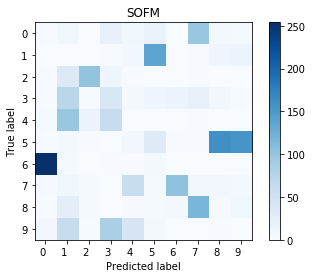

Mapping 6

Información del clasificador SOFM SOFM(verbose=True, step=0.05, show_epoch=5, shuffle_data=True, signals=None, n_inputs=64, n_outputs=10, weight=(64, 10), features_grid=[10, 1], distance=['euclid', 'neg_euclid_distance'], grid_type=['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid'], learning_radius=3, std=1, reduce_radius_after=5, reduce_std_after=100, reduce_step_after=100):
              precision    recall  f1-score   support

           0       0.02      0.03      0.03       200
           1       0.03      0.06      0.04       160
           2       0.00      0.00      0.00       170
           3       0.05      0.07      0.06       147
           4       0.03      0.02      0.03       166
           5       0.00      0.00      0.00       177
           6       0.01      0.00      0.00       359
           7       0.00      0.00      0.00       264
           8       0.04      0.04      0.04       198
           9       0.05      0.05      0.

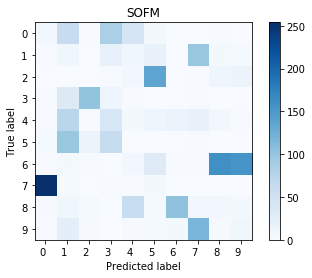

Mapping 7

Información del clasificador SOFM SOFM(verbose=True, step=0.05, show_epoch=5, shuffle_data=True, signals=None, n_inputs=64, n_outputs=10, weight=(64, 10), features_grid=[10, 1], distance=['euclid', 'neg_euclid_distance'], grid_type=['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid'], learning_radius=3, std=1, reduce_radius_after=5, reduce_std_after=100, reduce_step_after=100):
              precision    recall  f1-score   support

           0       0.00      0.01      0.00       166
           1       0.19      0.30      0.24       200
           2       0.00      0.00      0.00       160
           3       0.00      0.01      0.01       170
           4       0.01      0.01      0.01       147
           5       0.05      0.06      0.05       166
           6       0.00      0.00      0.00       177
           7       0.00      0.00      0.00       359
           8       0.00      0.00      0.00       264
           9       0.02      0.02      0.

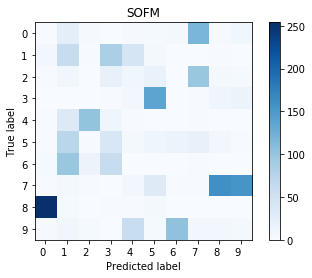

Mapping 8

Información del clasificador SOFM SOFM(verbose=True, step=0.05, show_epoch=5, shuffle_data=True, signals=None, n_inputs=64, n_outputs=10, weight=(64, 10), features_grid=[10, 1], distance=['euclid', 'neg_euclid_distance'], grid_type=['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid'], learning_radius=3, std=1, reduce_radius_after=5, reduce_std_after=100, reduce_step_after=100):
              precision    recall  f1-score   support

           0       0.01      0.01      0.01       198
           1       0.08      0.14      0.10       166
           2       0.01      0.01      0.01       200
           3       0.09      0.12      0.10       160
           4       0.05      0.04      0.05       170
           5       0.00      0.00      0.00       147
           6       0.11      0.08      0.09       166
           7       0.00      0.01      0.00       177
           8       0.84      0.45      0.58       359
           9       0.00      0.00      0.

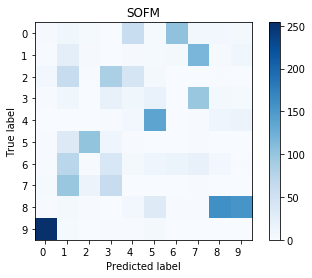

Mapping 9

Información del clasificador SOFM SOFM(verbose=True, step=0.05, show_epoch=5, shuffle_data=True, signals=None, n_inputs=64, n_outputs=10, weight=(64, 10), features_grid=[10, 1], distance=['euclid', 'neg_euclid_distance'], grid_type=['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid'], learning_radius=3, std=1, reduce_radius_after=5, reduce_std_after=100, reduce_step_after=100):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       264
           1       0.03      0.05      0.04       198
           2       0.02      0.01      0.01       166
           3       0.40      0.42      0.41       200
           4       0.07      0.06      0.06       160
           5       0.65      0.81      0.72       170
           6       0.00      0.00      0.00       147
           7       0.07      0.11      0.09       166
           8       0.00      0.00      0.00       177
           9       0.83      0.43      0.

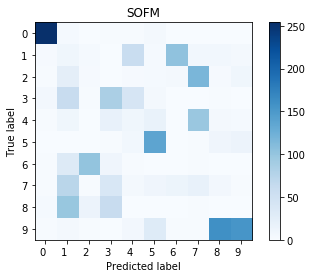

In [644]:
for k in range(10):
    print('Mapping {}'.format(k))
    new_ytest = (original_y_test + k) % 10
    
    clr = (sofm, classification_report(new_ytest, predicted))
    print("\nInformación del clasificador SOFM %s:\n%s\n\n" % clr)
    
    cm = confusion_matrix(new_ytest, predicted)              
    print("Confusion matrix:\n%s" % cm)
    
    classes = ['0','1', '2','3','4','5','6','7','8','9']            
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, 
           yticklabels=classes,
           title="SOFM",
           ylabel='True label',
           xlabel='Predicted label')
    
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor");
    plt.show()

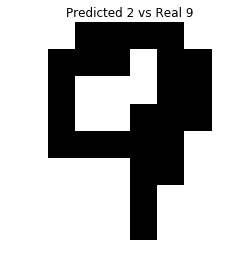

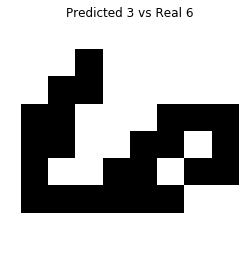

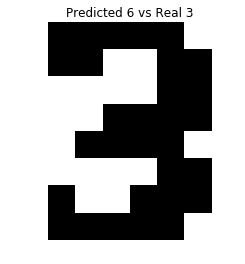

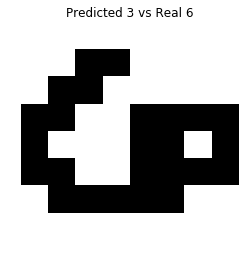

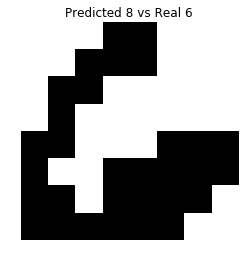

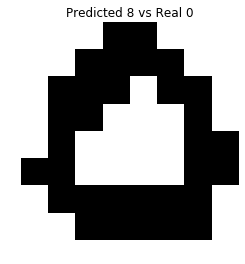

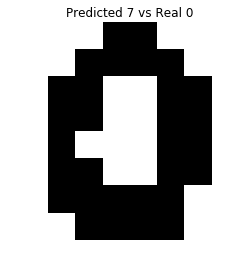

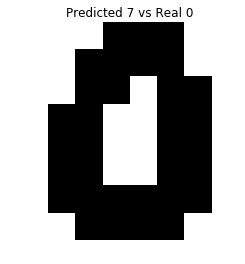

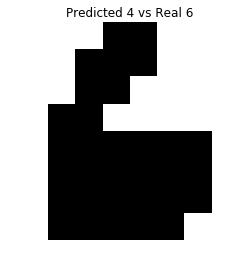

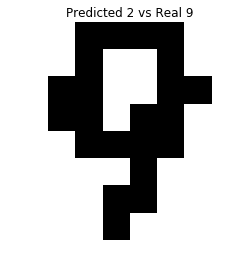

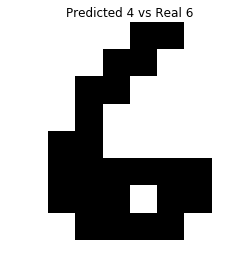

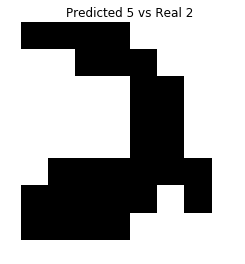

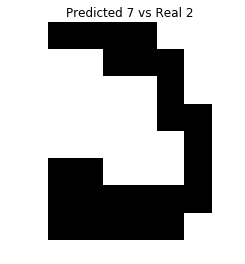

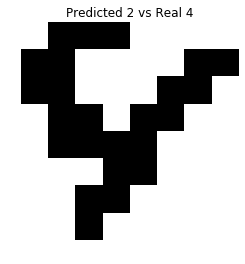

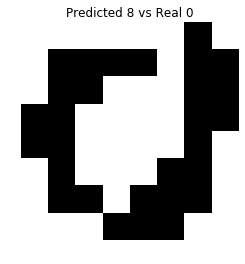

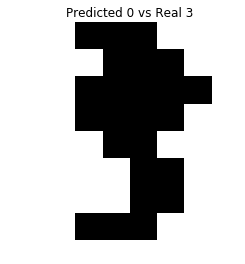

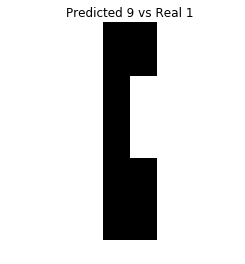

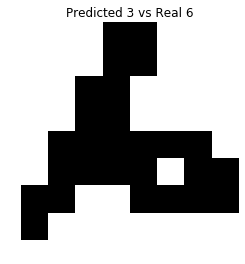

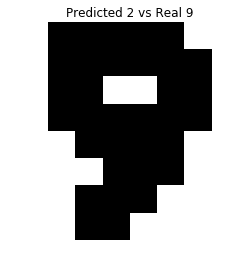

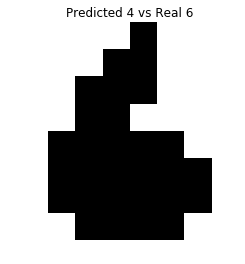

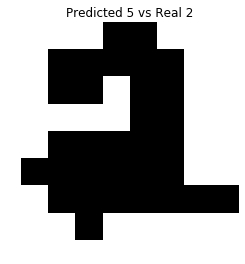

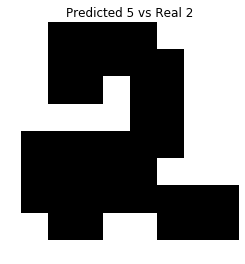

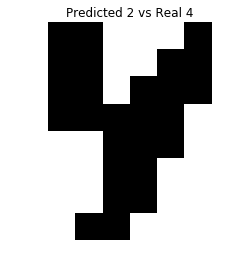

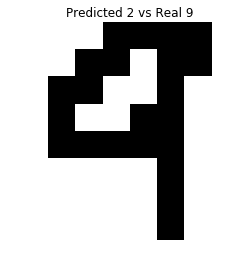

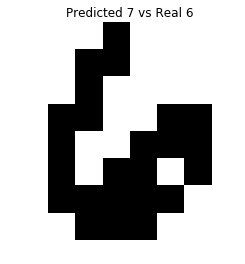

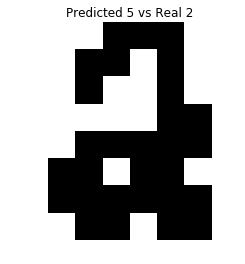

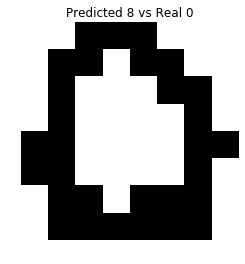

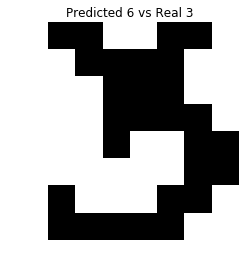

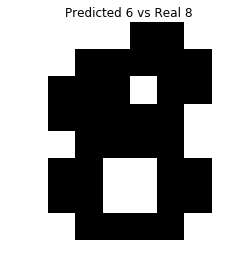

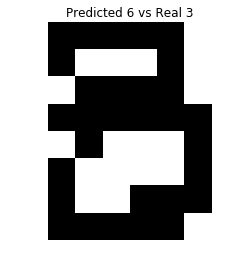

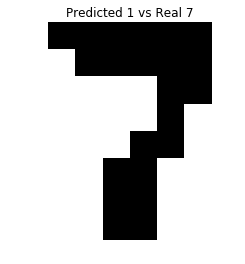

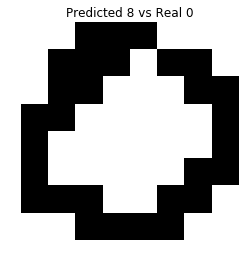

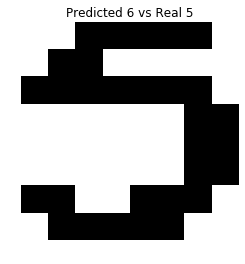

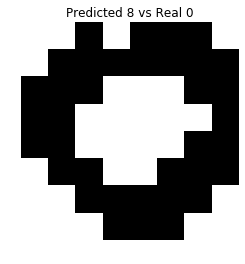

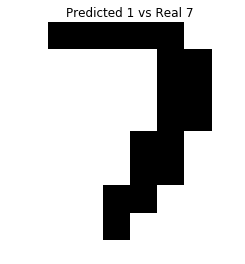

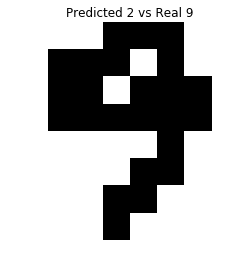

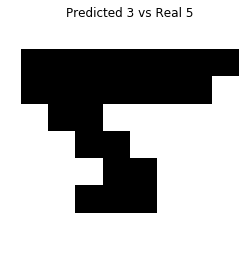

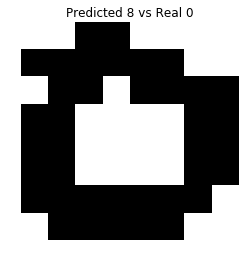

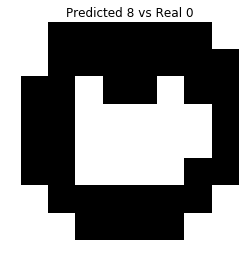

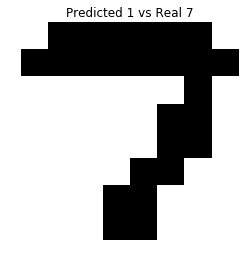

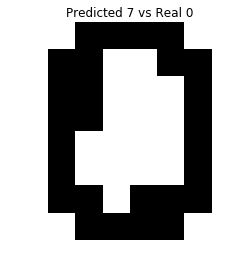

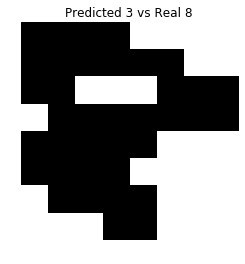

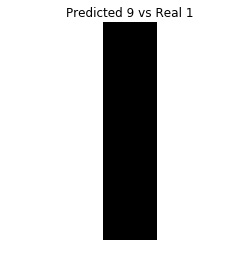

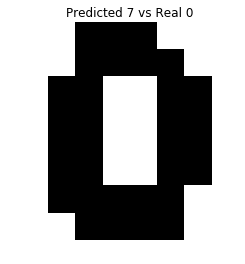

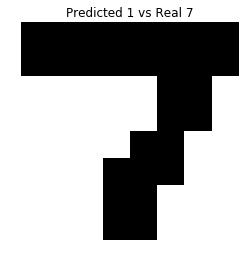

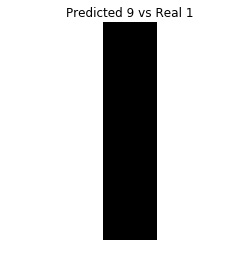

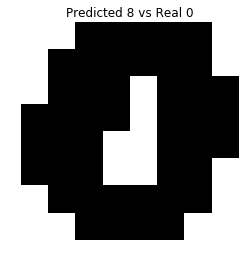

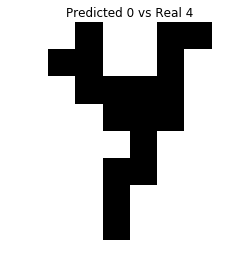

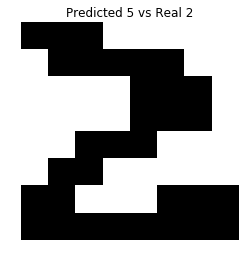

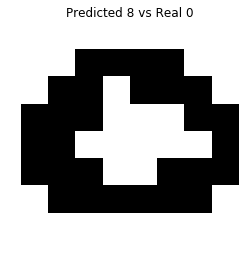

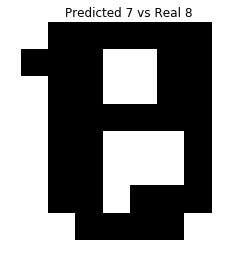

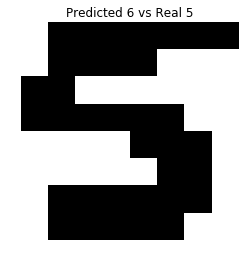

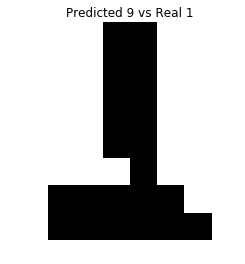

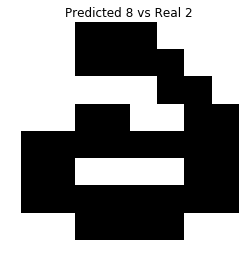

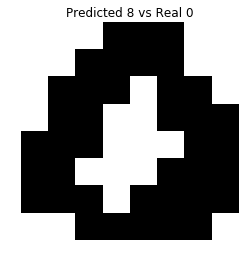

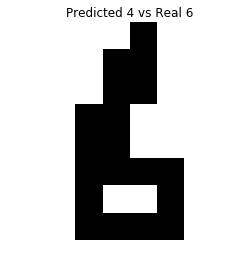

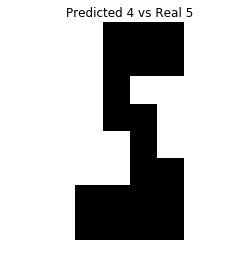

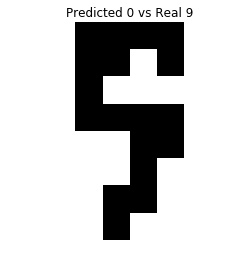

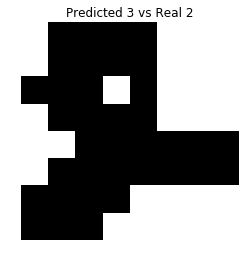

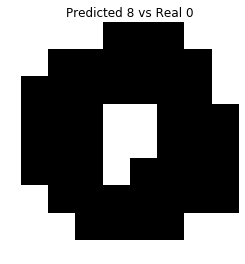

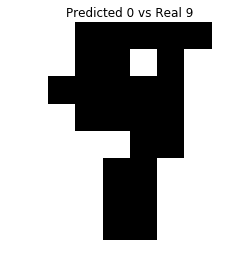

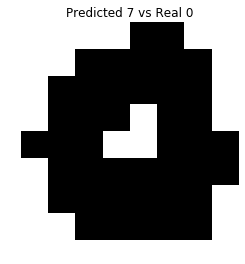

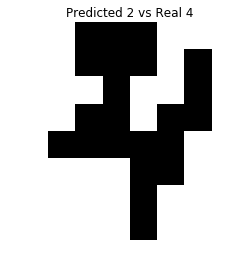

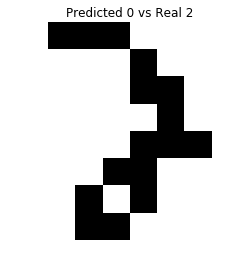

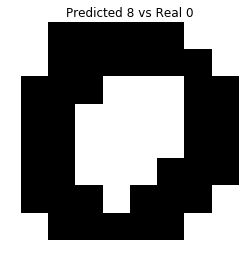

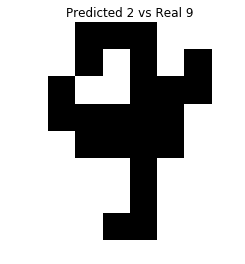

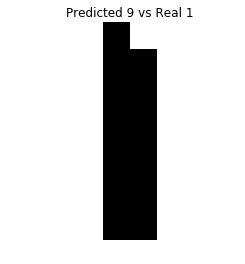

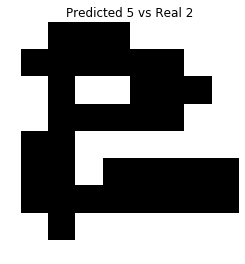

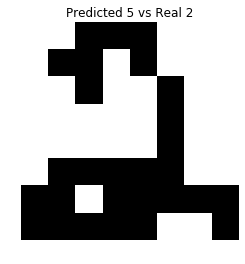

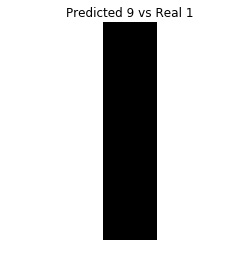

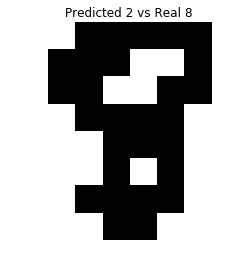

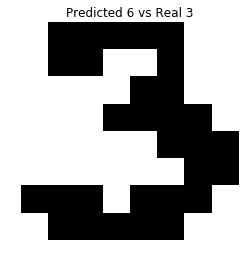

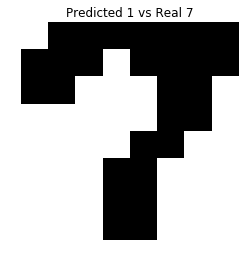

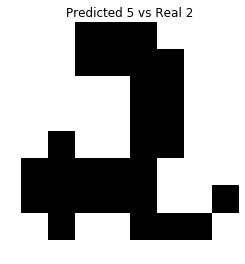

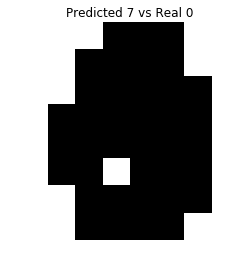

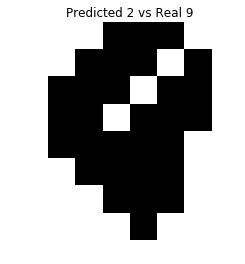

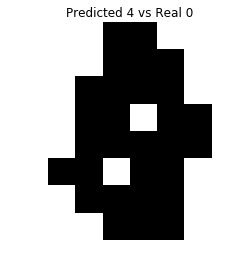

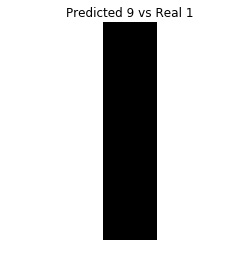

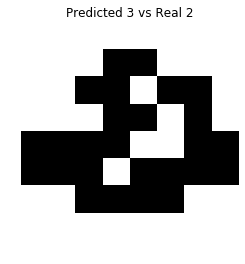

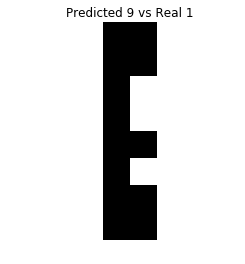

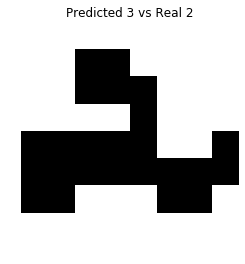

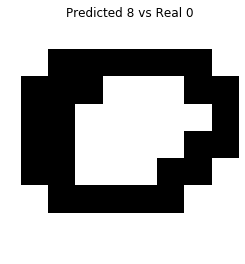

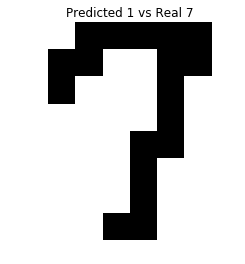

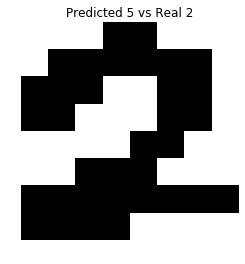

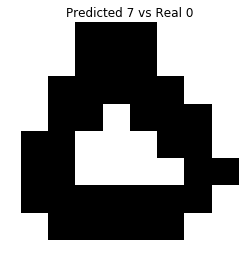

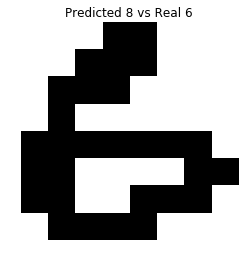

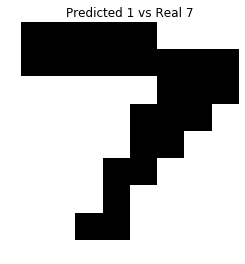

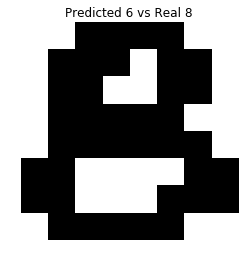

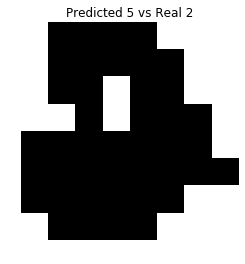

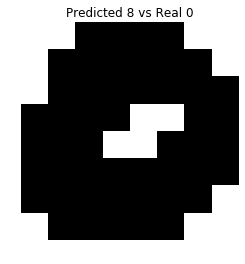

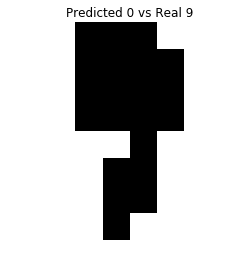

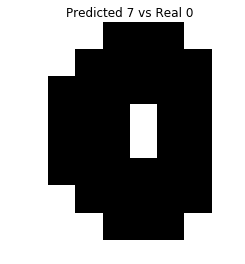

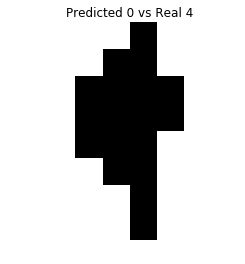

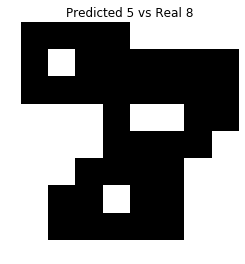

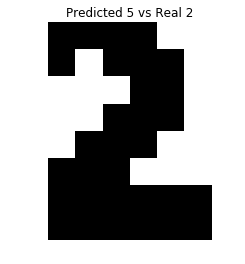

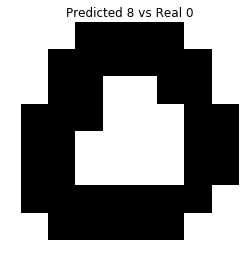

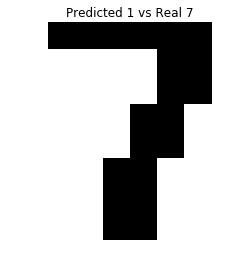

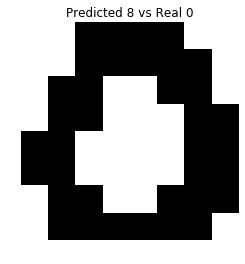

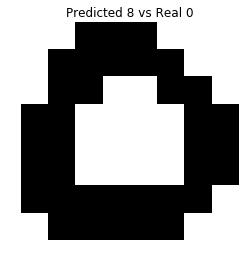

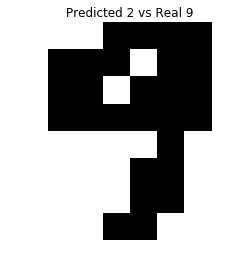

In [646]:
images_prediction = list(zip(matrix_x_test_resized, predicted, y_test))
images_prediction = images_prediction[0:100]
grid_len = int(sqrt(len(images_prediction))) + 1
for (image, prediction, real) in images_prediction:
    plt.figure()
    #plt.subplot(grid_len, grid_len, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Predicted {} vs Real {}'.format((prediction + 9) % 10, real))
    plt.show()

#plt.show()